In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from urllib.request import urlopen
from bs4 import BeautifulSoup

import nltk

from re import match
from nltk.corpus import cmudict
cmu = cmudict.dict()

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [4]:
# ancient code I modified from various stackoverflow things many years ago
# when I wrote this blog post: https://www.ifweassume.com/2013/02/stat-trek-ii-wrath-of-cant.html
# unfortunately I did not keep the links to the sources

def syllable_count(word):
    reduced = reduce(word)
    if (not len(reduced)) or (not reduced in cmu):
        return 0
    return len([x for x in list(''.join(list(cmu[reduced])[-1])) if match(r'\d', x)])

def reduce(word):
    return ''.join([x for x in word.lower() if match(r'\w', x)])

def grade_stats(text):
    sentences = nltk.tokenize.sent_tokenize(text)
    totalwords = 0
    totalsyllables = 0
    totalsentences = len(sentences)
    for sentence in sentences:
        words = nltk.tokenize.word_tokenize(sentence)
        words = [reduce(word) for word in words]
        words = [word for word in words if word != '']
        totalwords += len(words)
        syllables = [syllable_count(word) for word in words]
        totalsyllables += sum(syllables)
    totalwords = float(totalwords)
    return totalsentences, totalwords, totalsyllables



In [5]:
url_base = 'https://www.springfieldspringfield.co.uk/view_episode_scripts.php?tv-show=game-of-thrones&episode='

ep = 's01e06'

In [6]:
html = urlopen(url_base + ep)
bsObj = BeautifulSoup(html.read())

In [7]:
txt = BeautifulSoup.get_text(bsObj.find('div', {'class':'scrolling-script-container'})).lower()

In [8]:
sent_count, w_count, sy_count = grade_stats(txt)

In [9]:
# FRES: Flesch Readability Ease score
fres = 206.876 - 1.015 * (float(w_count)/sent_count) - 84.6 * (float(sy_count)/w_count)

# FKGL: Flesch-Kincaid Grade Level
fkgl = 0.39 * (float(w_count)/sent_count) + 11.8 * (float(sy_count)/w_count) - 11.59

print(fres,fkgl)

104.16840450767913 4.42786205143755


In [10]:
%%time
# fres = np.zeros((8,10)) - 99
# fkgl = np.zeros((8,10)) - 99

texts = np.empty((8,10), dtype='object')
sents = np.zeros((8,10)) - 99
sylls = np.zeros((8,10)) - 99
words = np.zeros((8,10)) - 99

for i in range(1,9):
    for k in range(1,11):
        ep = 's' + format(i, '02') + 'e' + format(k, '02')
        
        try:
            html = urlopen(url_base + ep)
            bsObj = BeautifulSoup(html.read())
            txt = BeautifulSoup.get_text(bsObj.find('div', {'class':'scrolling-script-container'}))
            
            texts[i-1, k-1] = txt.lower()
            
            sent_count, w_count, sy_count = grade_stats(txt.lower())
            
            sents[i-1, k-1] = sent_count
            sylls[i-1, k-1] = sy_count
            words[i-1, k-1] = w_count
#             fres[i-1, k-1] = 206.876 - 1.015 * (float(w_count)/sent_count) - 84.6 * (float(sy_count)/w_count)
#             fkgl[i-1, k-1] = 0.39 * (float(w_count)/sent_count) + 11.8 * (float(sy_count)/w_count) - 11.59

        except:
            print(i,k,ep,'some error... maybe not a valid url?')
        

7 1 s07e01 some error... maybe not a valid url?
7 8 s07e08 some error... maybe not a valid url?
7 9 s07e09 some error... maybe not a valid url?
7 10 s07e10 some error... maybe not a valid url?
8 7 s08e07 some error... maybe not a valid url?
8 8 s08e08 some error... maybe not a valid url?
8 9 s08e09 some error... maybe not a valid url?
8 10 s08e10 some error... maybe not a valid url?
CPU times: user 12.8 s, sys: 151 ms, total: 13 s
Wall time: 2min 29s


In [11]:
fres = 206.876 - 1.015 * ((words)/sents) - 84.6 * ((sylls)/words)
fkgl = 0.39 * ((words)/sents) + 11.8 * ((sylls)/words) - 11.59

In [22]:
ok = np.where((words.ravel() > 0))[0]

In [350]:
from matplotlib.patches import Rectangle
seasons = [0, 10, 20, 30, 40, 50, 60, 66, 72]

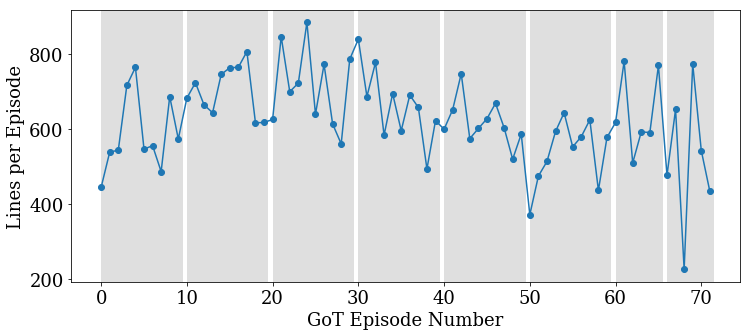

In [351]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(ok)), sents.ravel()[ok], marker='o')
plt.ylabel('Lines per Episode')
plt.xlabel('GoT Episode Number')

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

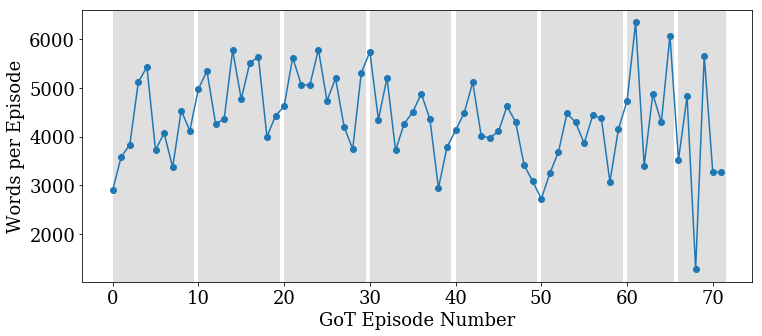

In [352]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(ok)), words.ravel()[ok], marker='o')
plt.ylabel('Words per Episode')
plt.xlabel('GoT Episode Number')

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

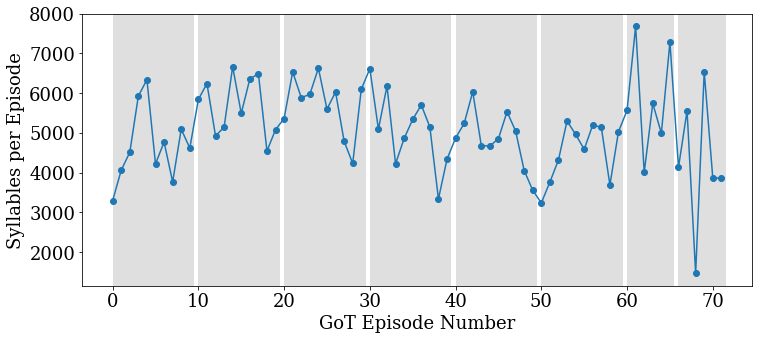

In [353]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(ok)), sylls.ravel()[ok], marker='o')
plt.ylabel('Syllables per Episode')
plt.xlabel('GoT Episode Number')

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig3.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

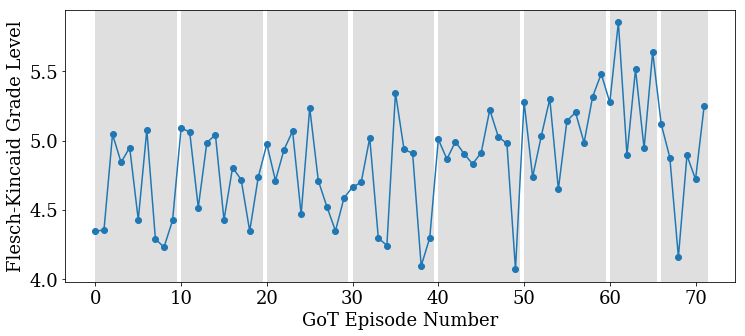

In [354]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(ok)), fkgl.ravel()[ok], marker='o')
plt.ylabel('Flesch-Kincaid Grade Level')
plt.xlabel('GoT Episode Number')

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig4.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

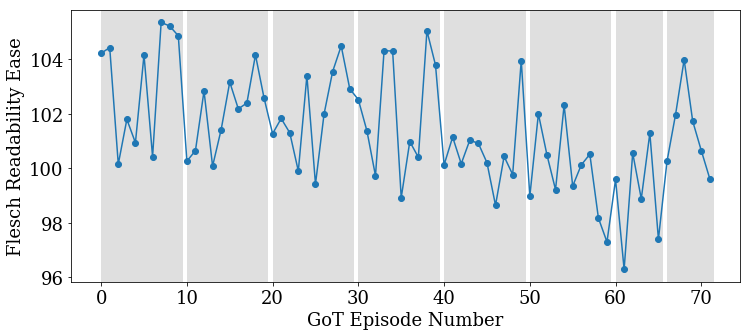

In [355]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(ok)), fres.ravel()[ok], marker='o')
plt.ylabel('Flesch Readability Ease')
plt.xlabel('GoT Episode Number')

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig5.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [356]:
def word_occur(word, txt_arr):
    output = np.zeros((8,10))
    for i in range(0,8):
        for k in range(0,10):
            try:
                output[i,k] = txt_arr[i,k].lower().count(word)
            except:
                pass
    return output

In [357]:
np.size(texts)

80

In [358]:
bigwords = texts[0,0]
for k in range(1, np.size(texts.ravel())):
    try:
        bigwords = bigwords + texts.ravel()[k]
    except:
        pass

In [359]:
word_occur('dragon', texts)

array([[ 1.,  6.,  2., 14.,  3.,  3.,  4.,  1.,  2.,  3.],
       [ 6.,  0.,  1., 11.,  5.,  5., 18.,  7.,  0.,  1.],
       [ 5.,  0.,  7.,  3.,  2.,  0.,  7.,  5.,  0.,  4.],
       [ 3.,  2.,  2.,  0.,  1.,  6.,  0.,  1.,  0.,  0.],
       [ 3.,  0.,  2.,  2.,  6.,  2.,  2.,  7., 10.,  3.],
       [ 1., 12.,  0.,  3.,  6.,  3.,  1.,  2.,  5.,  7.],
       [ 0., 24., 17., 13., 13.,  4., 16.,  0.,  0.,  0.],
       [19.,  5.,  7., 16.,  7.,  2.,  0.,  0.,  0.,  0.]])

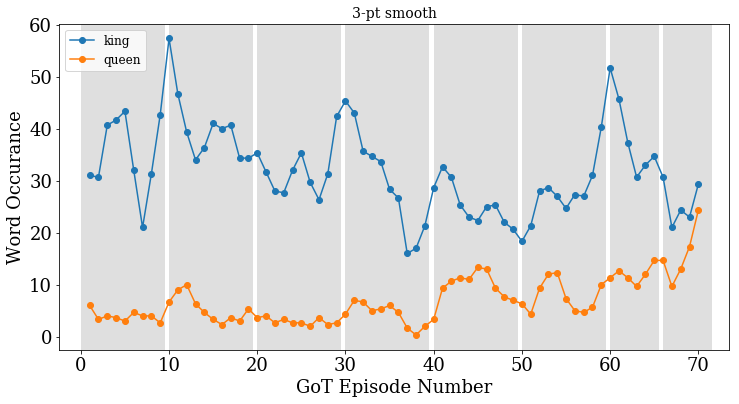

In [360]:
# bag = ['fire', 'ice', 'war', 'bastard', 'queen', 'king', 'winter', 'summer', 'dragon']
bag = ['king', 'queen']

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=3, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title('3-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig6.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

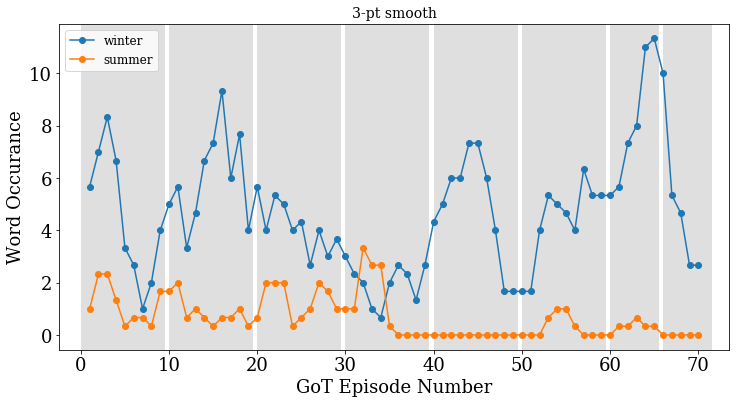

In [361]:
bag = ['winter', 'summer']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig7.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

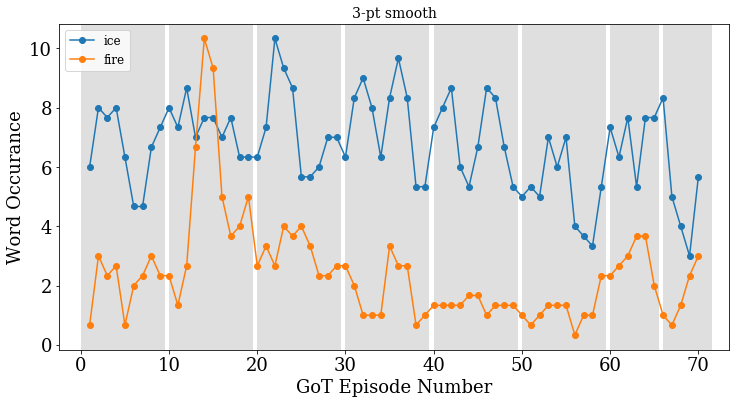

In [362]:
bag = ['ice', 'fire']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig8.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

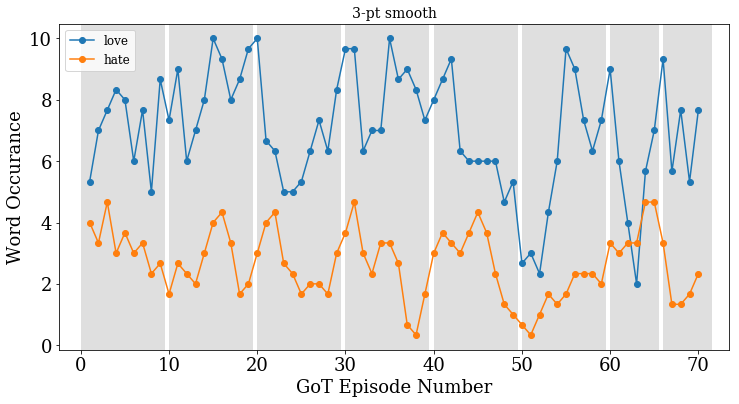

In [363]:
bag = ['love', 'hate']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig9.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

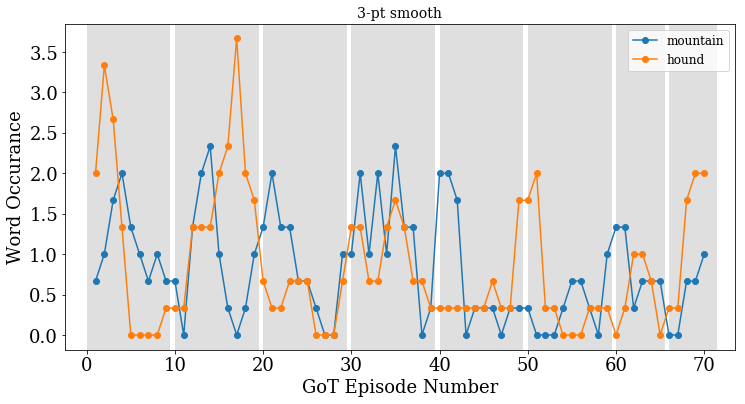

In [364]:
bag = ['mountain', 'hound']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig10.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

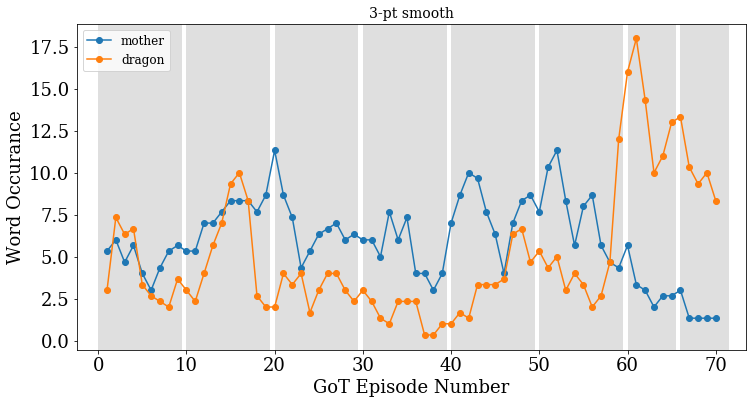

In [365]:
bag = ['mother', 'dragon']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig11.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

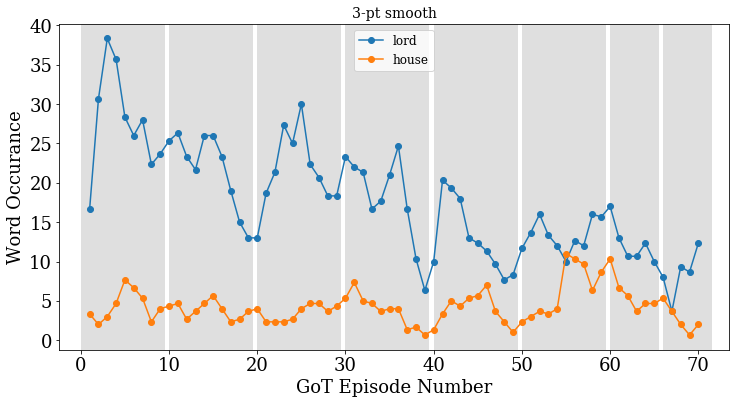

In [366]:
bag = ['lord', 'house']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig12.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

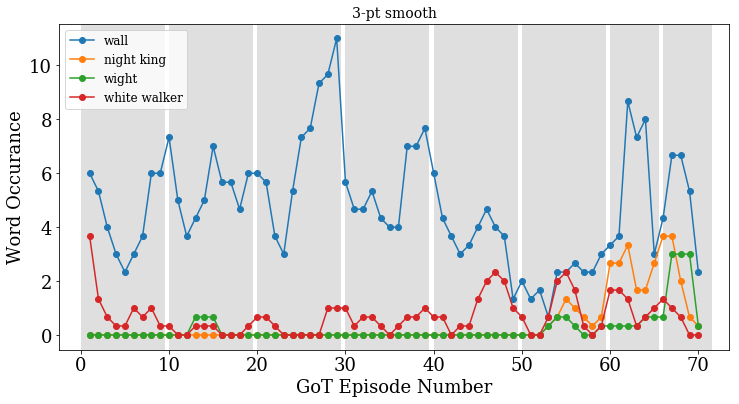

In [367]:
bag = ['wall', 'night king', 'wight', 'white walker']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig13.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

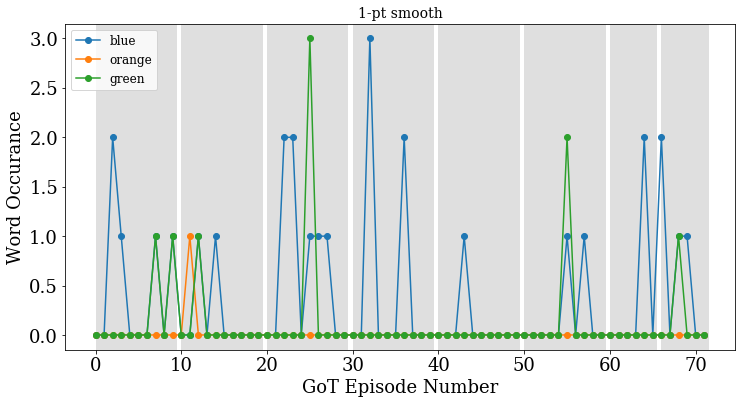

In [368]:
bag = ['blue','orange','green']

window=1

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig14.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

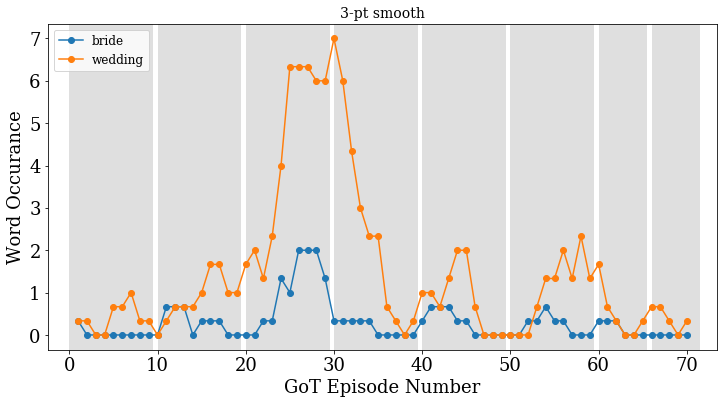

In [369]:
bag = ['bride', 'wedding']

window=3

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig15.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

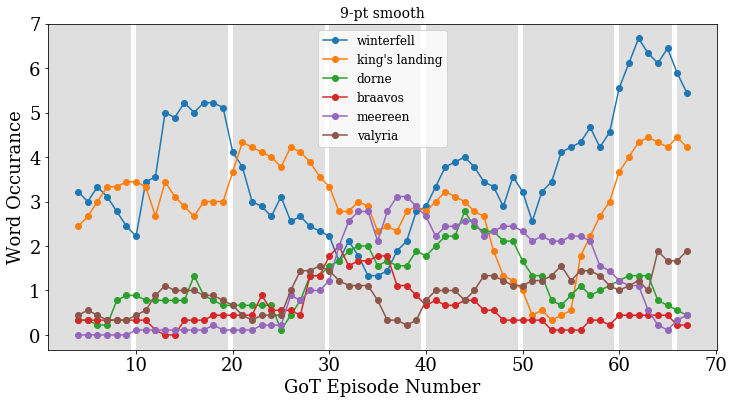

In [385]:
bag = ['winterfell', "king's landing", 'dorne', 'braavos', 'meereen', 'valyria']

window=9

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig17.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

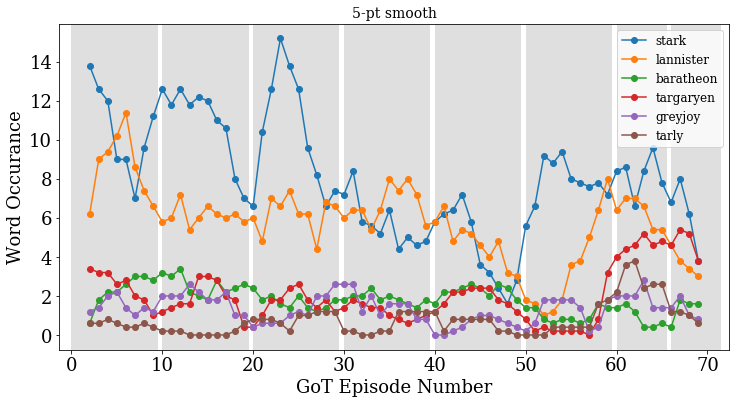

In [371]:
bag = ['stark', 'lannister', 'baratheon', 'targaryen', 'greyjoy', 'tarly']

window=5

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig18.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

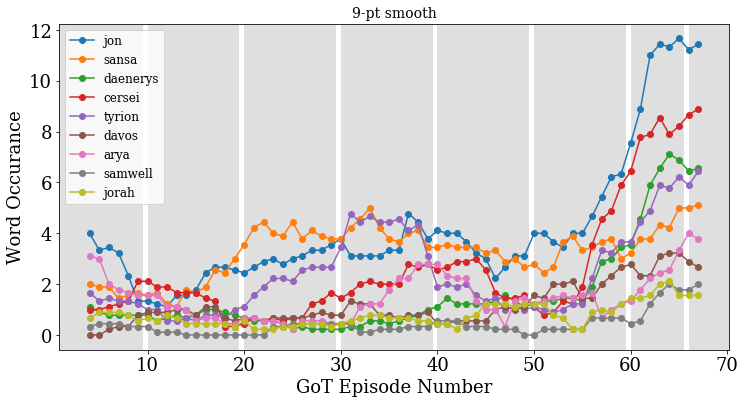

In [372]:
bag = ['jon', 'sansa','daenerys', 'cersei', 'tyrion', 'davos', 'arya','samwell','jorah']

window=9

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig19.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

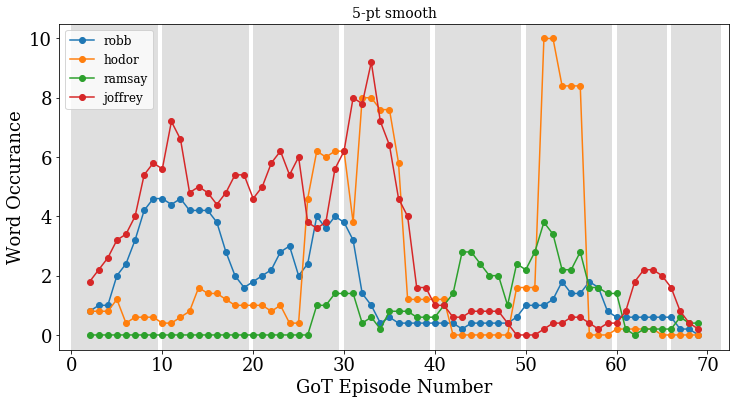

In [373]:
bag = ['robb', 'hodor', 'ramsay','joffrey',]

window=5

plt.figure(figsize=(12,6))
for k in range(len(bag)):
    plt.plot(np.arange(len(ok)), 
             pd.Series(word_occur(bag[k], texts).ravel()[ok]).rolling(window=window, center=True).mean(), 
             marker='o', label=bag[k])

plt.ylabel('Word Occurance')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))

plt.savefig('../figures/fig20.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [374]:
from collections import Counter 

In [375]:
cnt = Counter(bigwords.split())

In [376]:
cnt.most_common(10)

[('the', 12320),
 ('you', 8951),
 ('to', 8108),
 ('i', 7717),
 ('a', 6200),
 ('and', 5138),
 ('-', 4897),
 ('of', 4520),
 ('your', 3454),
 ('my', 3335)]

In [377]:
places = ['winterfell', "king's landing", 'dorne', 'braavos', 'meereen', 'quarth', 'valyria']
for k in places:
    print(bigwords.count(k), k)

261 winterfell
214 king's landing
79 dorne
39 braavos
84 meereen
1 quarth
74 valyria


In [378]:
ppl = ['jon', 'jaime', 'theon', 'tyrion','robb','davos', 'sansa',
       'daenerys', 'cersei','arya','catelyn', 'samwell','bran']
for k in ppl:
    print(bigwords.count(k),k)

328 jon
159 jaime
230 theon
193 tyrion
119 robb
85 davos
241 sansa
131 daenerys
205 cersei
128 arya
40 catelyn
37 samwell
150 bran


In [379]:
mains = pd.read_table('mains.txt', names=('Name',))
seconds = pd.read_table('seconds.txt', names=('Name',))
print(len(mains), len(seconds))

44 115


1.6120401337792643


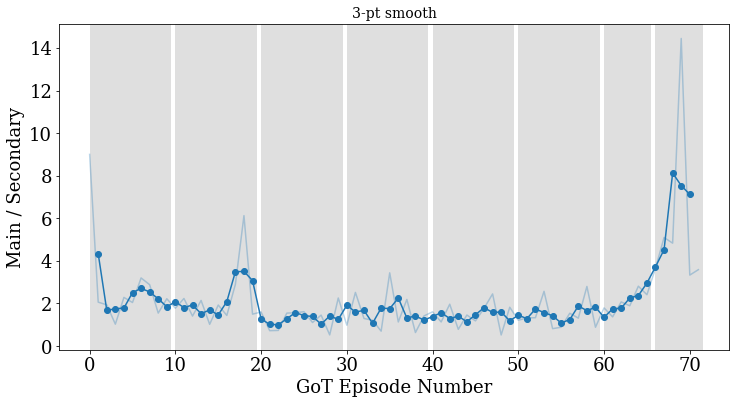

In [380]:
window=3

plt.figure(figsize=(12,6))

m_score = np.zeros(len(ok))
for k in mains['Name'].values:
    m_score += word_occur(k.lower(), texts).ravel()[ok]

    s_score = np.zeros(len(ok))
for k in seconds['Name'].values:
    s_score += word_occur(k.lower(), texts).ravel()[ok]

plt.plot(np.arange(len(ok)), m_score/s_score, alpha=0.3)
plt.plot(np.arange(len(ok)), 
         pd.Series(m_score/s_score).rolling(window=window, center=True).mean(), 
         marker='o', c='C0')


plt.ylabel('Main / Secondary')
plt.xlabel('GoT Episode Number')
plt.title(str(window)+'-pt smooth', fontsize=14)
# plt.legend(fontsize=12)

ylim = plt.gca().get_ylim()
for j in range(len(seasons)-1):
    plt.gca().add_patch(Rectangle((seasons[j], ylim[0]), 
                                  (seasons[j+1] - seasons[j])-0.5, ylim[1]-ylim[0], 
                                  linewidth=0, color='grey',alpha=0.25))
plt.savefig('../figures/fig21.png', dpi=150, bbox_inches='tight', pad_inches=0.25)


print(np.nanmedian(m_score/s_score))